In [11]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Car Features Dataset

In [12]:
# Loading datasets
df_airbnb = pd.read_csv('/Users/rad/Desktop/Useable Ai/Assignments/Final Submission/HW5/airnb.csv')

## Data Familiarization

In [35]:
df_airbnb.head()

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed,Price,Offer_Price,Rating,Beds
0,"Chalet in Skykomish, Washington, US",Sky Haus - A-Frame Cabin,Jun 11 - 16,306.00,229.00,4.85 (531),4 beds,306.0,229.0,4.85,4.0
1,"Cabin in Hancock, New York, US",The Catskill A-Frame - Mid-Century Modern Cabin,Jun 6 - 11,485.00,170.00,4.77 (146),4 beds,485.0,170.0,4.77,4.0
2,"Cabin in West Farmington, Ohio, US",The Triangle: A-Frame Cabin for your city retreat,Jul 9 - 14,119.00,522.00,4.91 (515),4 beds,119.0,522.0,4.91,4.0
3,"Home in Blue Ridge, Georgia, US",*Summer Sizzle* 5 Min to Blue Ridge* Pets* Hot...,Jun 11 - 16,192.00,348.00,4.94 (88),5 beds,192.0,348.0,4.94,5.0
4,"Treehouse in Grandview, Texas, US",Luxury Treehouse Couples Getaway w/ Peaceful V...,Jun 4 - 9,232.00,196.00,4.99 (222),1 queen bed,232.0,196.0,4.99,1.0


**Identify data types:**

In [36]:
df_airbnb.dtypes

Title                      object
Detail                     object
Date                       object
Price(in dollar)           object
Offer price(in dollar)     object
Review and rating          object
Number of bed              object
Price                     float64
Offer_Price               float64
Rating                    float64
Beds                      float64
dtype: object

### **Categorical Data:**

- **Title**: The name or title of the listing.
- **Detail**: Description or details about the listing. 
- **Date**: The date range for availability. 
- **Price(in dollar)**: Price per night.
- **Offer price(in dollar)**: Discounted price per night.
- **Review and rating**: Review and rating.
- **Number of bed**: The description of the number of beds.

---

### **Numerical Data:**

- **Price**: The numeric price for the listing, converted into a float64.
- **Offer_Price**: The numeric offer price for the listing, converted into a float64.
- **Rating**: The extracted numeric rating from the Review and rating column, converted into a float64.
- **Beds**: The number of beds extracted from the Number of bed column, converted into a float64.


In [41]:
total_entries = df_airbnb.shape[0]
print(f"Total number of rows (entries): {total_entries}")

Total number of rows (entries): 953


In [42]:
# Data Cleaning
df_airbnb['Price'] = df_airbnb['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df_airbnb['Offer_Price'] = df_airbnb['Offer_Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/var/folders/2y/4bdg0r757s54_6cn9jgfy1rr0000gn/T/ipykernel_29837/2896702520.py:2: SyntaxWarning: invalid escape sequence '\$'
  df_airbnb['Price'] = df_airbnb['Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
/var/folders/2y/4bdg0r757s54_6cn9jgfy1rr0000gn/T/ipykernel_29837/2896702520.py:3: SyntaxWarning: invalid escape sequence '\$'
  df_airbnb['Offer_Price'] = df_airbnb['Offer_Price'].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [17]:
df_airbnb['Rating'] = pd.to_numeric(df_airbnb['Review_and_rating'].str.extract(r'([\d.]+)')[0], errors='coerce')

In [21]:
df_airbnb['Beds'] = df_airbnb['Number of bed'].str.extract(r'(\d+)').astype(float)

In [22]:
# Handling Missing Values:
df_airbnb['Price'] = df_airbnb['Price'].fillna(df_airbnb['Price'].median())
df_airbnb['Offer_Price'] = df_airbnb['Offer_Price'].fillna(df_airbnb['Offer_Price'].median())
df_airbnb['Rating'] = df_airbnb['Rating'].fillna(df_airbnb['Rating'].median())
df_airbnb['Beds'] = df_airbnb['Beds'].fillna(df_airbnb['Beds'].median())

In [23]:
# Removing any rows where critical information is missing 
df_airbnb.dropna(subset=['Title', 'Date'], inplace=True)

In [25]:
# Resetting index after data cleaning
df_airbnb.reset_index(drop=True, inplace=True)

In [26]:
df_airbnb.head()

,Title,Detail,Date,Price(in dollar),Offer price(in dollar),Review and rating,Number of bed,Price,Offer_Price,Rating,Beds
0,"Chalet in Skykomish, Washington, US",Sky Haus - A-Frame Cabin,Jun 11 - 16,306.00,229.00,4.85 (531),4 beds,306.0,229.0,4.85,4.0
1,"Cabin in Hancock, New York, US",The Catskill A-Frame - Mid-Century Modern Cabin,Jun 6 - 11,485.00,170.00,4.77 (146),4 beds,485.0,170.0,4.77,4.0
2,"Cabin in West Farmington, Ohio, US",The Triangle: A-Frame Cabin for your city retreat,Jul 9 - 14,119.00,522.00,4.91 (515),4 beds,119.0,522.0,4.91,4.0
3,"Home in Blue Ridge, Georgia, US",*Summer Sizzle* 5 Min to Blue Ridge* Pets* Hot...,Jun 11 - 16,192.00,348.00,4.94 (88),5 beds,192.0,348.0,4.94,5.0
4,"Treehouse in Grandview, Texas, US",Luxury Treehouse Couples Getaway w/ Peaceful V...,Jun 4 - 9,232.00,196.00,4.99 (222),1 queen bed,232.0,196.0,4.99,1.0


In [43]:
min_values = df_airbnb[['Price', 'Offer_Price', 'Rating', 'Beds']].min()
max_values = df_airbnb[['Price', 'Offer_Price', 'Rating', 'Beds']].max()

In [45]:
print("Minimum values:")
print(min_values)

print("\nMaximum values:")
print(max_values)

Minimum values:
Price          16.00
Offer_Price    16.00
Rating          3.67
Beds            1.00
dtype: float64

Maximum values:
Price          986.0
Offer_Price    819.0
Rating           5.0
Beds            22.0
dtype: float64


## Descriptive Statistics

In [49]:
# 1. Mean 
mean_price = df_airbnb['Price'].mean()
mean_offer_price = df_airbnb['Offer_Price'].mean()
mean_rating = df_airbnb['Rating'].mean()
mean_beds = df_airbnb['Beds'].mean()

# 2. Standard Deviation 
std_price = df_airbnb['Price'].std()
std_offer_price = df_airbnb['Offer_Price'].std()
std_rating = df_airbnb['Rating'].std()
std_beds = df_airbnb['Beds'].std()

# 3. Quantile (median or 50th percentile) 
median_price = df_airbnb['Price'].quantile(0.5)
median_offer_price = df_airbnb['Offer_Price'].quantile(0.5)
median_rating = df_airbnb['Rating'].quantile(0.5)
median_beds = df_airbnb['Beds'].quantile(0.5)

print("Mean values:")
print(f"Price: {mean_price}")
print(f"Offer Price: {mean_offer_price}")
print(f"Rating: {mean_rating}")
print(f"Beds: {mean_beds}")

print("\nStandard Deviation values:")
print(f"Price: {std_price}")
print(f"Offer Price: {std_offer_price}")
print(f"Rating: {std_rating}")
print(f"Beds: {std_beds}")

print("\nMedian values (Quantile 0.5):")
print(f"Price: {median_price}")
print(f"Offer Price: {median_offer_price}")

Mean values:
Price: 169.96274921301153
Offer Price: 123.697796432319
Rating: 4.863158447009444
Beds: 2.1825813221406087

Standard Deviation values:
Price: 135.33253833557492
Offer Price: 57.32999132045158
Rating: 0.13579439891150502
Beds: 1.6418345351164931

Median values (Quantile 0.5):
Price: 134.5
Offer Price: 118.0


## Statistical Summary of the Data

In [27]:
summary_stats = df_airbnb.describe()

In [47]:
summary_stats[['Price', 'Offer_Price', 'Rating', 'Beds']]

,Price,Offer_Price,Rating,Beds
count,953.000000,953.000000,953.000000,953.000000
mean,169.962749,123.697796,4.863158,2.182581
std,135.332538,57.329991,0.135794,1.641835
min,16.000000,16.000000,3.670000,1.000000
25%,83.000000,118.000000,4.820000,1.000000
50%,134.500000,118.000000,4.890000,2.000000
75%,220.000000,118.000000,4.960000,3.000000
max,986.000000,819.000000,5.000000,22.000000


In [46]:
df_airbnb["Title"].unique()

array(['Chalet in Skykomish, Washington, US',
       'Cabin in Hancock, New York, US',
       'Cabin in West Farmington, Ohio, US',
       'Home in Blue Ridge, Georgia, US',
       'Treehouse in Grandview, Texas, US',
       'Tiny home in Puerto Escondido, Mexico', 'Home in Saco, Maine, US',
       'Chalet in Grand Étang, Canada', 'Room in Mexico City, Mexico',
       'Tiny home in Sandy Valley, Nevada, US',
       'Guest suite in Huntsville, Canada', 'Cabin in Nelson, Canada',
       'Dome in Joshua Tree, California, US',
       'Barn in Vero Beach, Florida, US',
       'Tiny home in Bolton, Vermont, US', 'Cabin in Ucluelet, Canada',
       'Barn in Essex, Canada', 'Apartment in Bacalar, Mexico',
       'Treehouse in Travelers Rest, South Carolina, US',
       'Farm stay in Del Norte County, California, US',
       'Treehouse in San Carlos, Costa Rica',
       'Treehouse in Frazeysburg, Ohio, US', 'Cabin in Rodney, Canada',
       'Room in La Habana, Cuba', 'Dome in Terlingua, Texas, 

### Data Visualization|

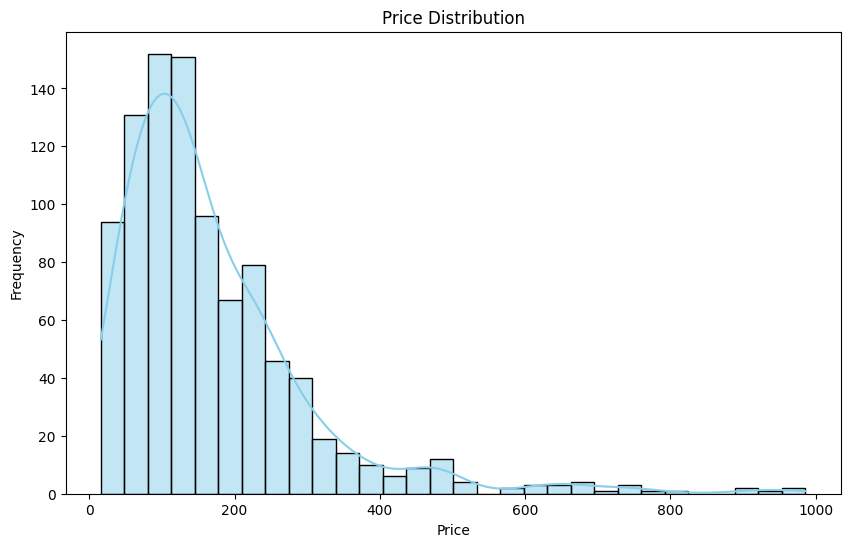

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Price Distribution 
plt.figure(figsize=(10, 6))
sns.histplot(df_airbnb['Price'], bins=30, kde=True, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Based on the Price Distribution histogram with the KDE overlay, we can draw a few important insights about the dataset. The distribution is notably right-skewed, meaning that most of the listings are priced on the lower end, with only a small number of higher-priced properties extending the range. This suggests that budget-friendly listings dominate the platform, but there is a long tail of more expensive listings, likely representing premium or luxury properties.

The majority of listings seem to fall under $200, which points to a higher volume of affordable options available to users. This aligns with the expectation that most customers are likely seeking cost-effective choices. On the other hand, the presence of outliers at the higher end of the price spectrum indicates that there are a few listings that are significantly more expensive than the majority, perhaps due to unique features, locations, or exclusivity.

The KDE curve further confirms this trend, showing a sharp peak around the lower price range and a gradual decline as prices increase. It visually reinforces the idea that while low-priced listings are abundant, high-priced ones are much rarer.

In conclusion, the dataset suggests a prevalence of budget-conscious options, with a few luxury outliers pushing the upper end of the price range. This skewed distribution might inform strategies for categorizing listings, targeting users based on budget, or setting price ranges for different types of accommodations. It would also be insightful to explore the relationship between price and other features like property type, location, or amenities to better understand what drives the higher-end listings.

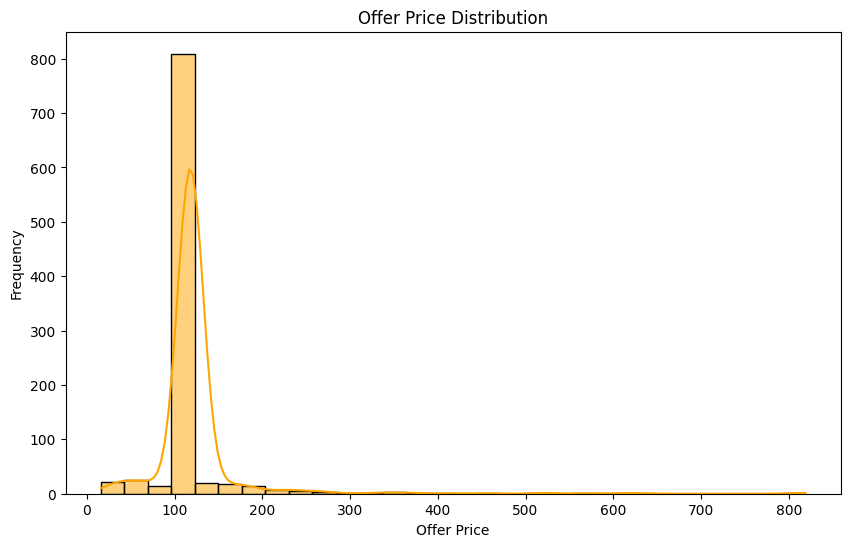

In [30]:
# Offer Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_airbnb['Offer_Price'], bins=30, kde=True, color='orange')
plt.title('Offer Price Distribution')
plt.xlabel('Offer Price')
plt.ylabel('Frequency')
plt.show()

### **Offer Price Distribution Insights**

Looking at the **Offer Price Distribution** histogram, we can see a few interesting patterns. First, there’s a sharp peak around the **100 mark**, indicating that most of the listings in the dataset have offer prices close to 100. This suggests that $100 might be a standard or popular price point for many properties, likely reflecting a balance between affordability and the quality of the listing.

The distribution is **right-skewed**, meaning the bulk of listings are priced around $100, but there are a few listings that extend much higher. This long tail on the right side indicates that while there are **high-priced listings** with steep discounts, they are quite rare. These higher-priced listings are likely luxury or unique properties, but they don’t make up the majority of the dataset.

The **KDE curve** further highlights this pattern. It shows a smooth, concentrated peak around $100 and a gradual drop-off as the price increases. This reinforces the idea that the majority of users are interacting with budget-friendly listings, while the high-end ones are much less common.

### **Conclusions**

n conclusion, the 100 price range is where most of the action happens, but the few high-priced listings create a right-skewed distribution. This could be useful for setting pricing strategies or for understanding what price points attract the most listings. If you’re looking to optimize for affordability, this insight suggests focusing on the mid-range, around $100.

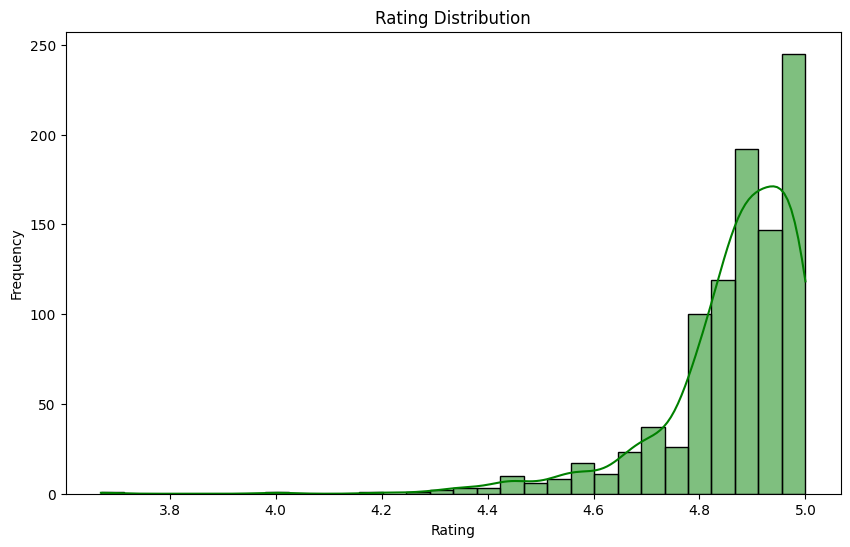

In [31]:
# Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_airbnb['Rating'], bins=30, kde=True, color='green')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

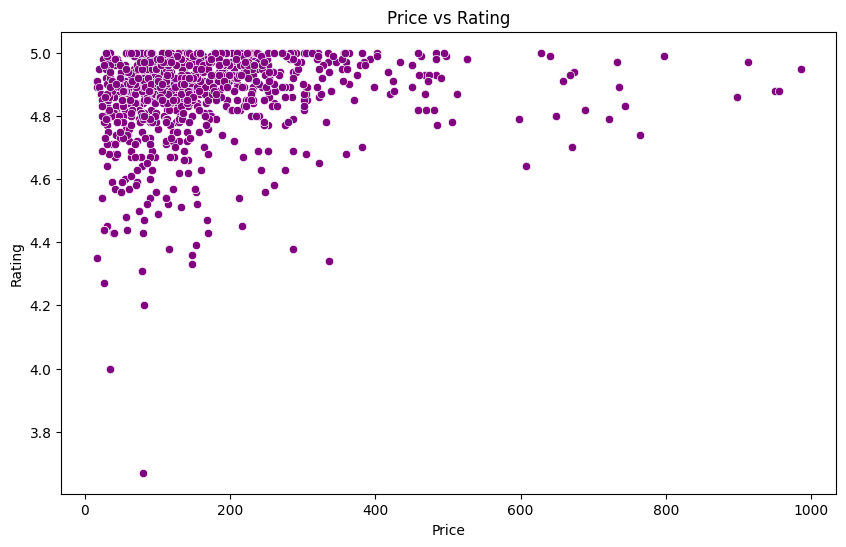

In [32]:
# Scatterplot: Price vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_airbnb, x='Price', y='Rating', color='purple')
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

Looking at the Price vs Rating scatter plot, we can draw a few key insights. First, we notice that the majority of listings have a rating around 4.8 to 5, with very few listings falling below a rating of 4.5. This suggests that most properties tend to have high ratings, possibly indicating that users are generally satisfied with the listings.

When we look at the relationship between Price and Rating, it appears that there is little to no clear correlation. While some higher-priced listings are associated with a slightly lower rating, the majority of high-rated listings seem to cluster around the lower price range. This could imply that higher prices do not necessarily result in better ratings. It's possible that users prioritize affordability over price in their reviews, or it could suggest that there are a few expensive outliers that do not receive as high ratings as their lower-priced counterparts.

Additionally, there seems to be a broad spread of prices, with a concentration of listings priced between $50 and $200. The upper end of the price spectrum has a few outliers, with some listings reaching $600 to $800, but these are less common.

In conclusion, while there is a slight suggestion that higher-priced listings might correlate with slightly lower ratings, the relationship is not very strong. The high ratings across all price points indicate that people are generally happy with their stays, regardless of the price they pay. This suggests that factors beyond price, such as property quality or host behavior, might play a larger role in influencing user ratings.

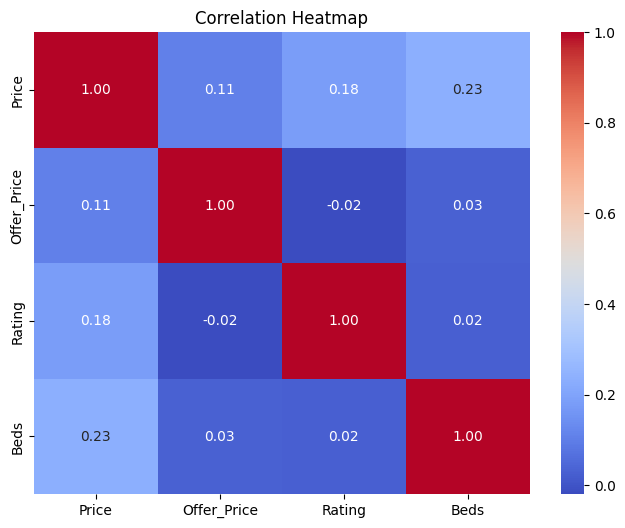

In [34]:
# Correlation Heatmap 
corr_matrix = df_airbnb[['Price', 'Offer_Price', 'Rating', 'Beds']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### **Correlation Heatmap Insights**

Looking at the **Correlation Heatmap**, we can gather some interesting insights about how different features in the dataset are connected. First, the relationship between **Price** and **Offer Price** is very weak (0.11). This suggests that while there is a slight connection between the listed price and the offer price, they don’t strongly influence each other. This could mean that the discounts or offers don’t always correlate directly with the initial listing prices of the properties.

When it comes to **Price** and **Rating**, the correlation is slightly positive (0.18). This indicates that higher-priced properties tend to have a slightly higher rating, but it’s not a strong relationship. The slight positive correlation might suggest that users give better ratings to more expensive properties, but other factors likely play a bigger role in influencing ratings.

There’s a moderate positive correlation (0.23) between **Price** and **Beds**, which makes sense. Larger properties with more beds are generally priced higher, so this correlation reflects our expectations that bigger spaces tend to cost more.

Interestingly, there’s almost no correlation between **Offer Price** and **Rating** (-0.02). This means that discounts or lower prices don’t really impact how users rate properties. It suggests that factors like property quality or location could be much more important in influencing ratings than the price or discount.

When it comes to **Offer Price** and **Beds**, the correlation is almost non-existent (0.03), meaning the number of beds doesn’t have much of an effect on the discounted price. Similarly, the correlation between **Rating** and **Beds** is very weak (0.02), which tells us that the number of beds in a property doesn’t have a significant impact on how it’s rated by users.

### **Conclusions**

Overall, the correlations reveal that **Price** and **Offer Price** don’t have a strong influence on **Ratings**, meaning there are likely other factors at play in how users rate their stays. **Price** does show a moderate correlation with **Beds**, which makes sense—bigger properties tend to be more expensive. However, **Offer Price** doesn’t seem to influence the ratings much, suggesting that discounts don’t affect users’ satisfaction. These insights give us a better understanding
